# Anomaly detection code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyod.utils import data

In [4]:
# Generating some random data for Anomaly detection
nfeatures = 2
ntrain = 800
ntest = 200
xtrain,ytrain,xtest,ytest = data.generate_data(n_train=ntrain,n_features=nfeatures,n_test=ntest,
                                              contamination=0.1,random_state=3)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(800, 2)
(200, 2)
(800,)
(200,)


C:\ProgramData\Anaconda3\lib\site-packages\pyod\utils\data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [24]:
xtrain

array([[ 8.06843097,  6.67850821],
       [ 7.80329076,  7.74842344],
       [ 7.94132406,  7.55536384],
       ...,
       [ 3.45133909,  3.71189643],
       [-1.93287594, -6.96437481],
       [-7.03569489,  3.44550378]])

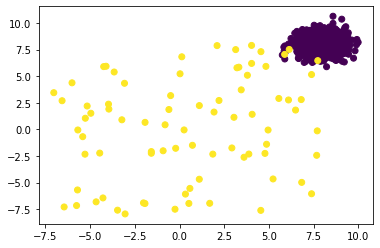

In [5]:
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain)
plt.show()

# Anomaly detection using Isolation Forest

In [28]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators=50,max_features=2,contamination=0.11,random_state=5,
                       behaviour='new')
model.fit(xtrain)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.11,
                max_features=2, max_samples='auto', n_estimators=50,
                n_jobs=None, random_state=5, verbose=0, warm_start=False)

In [29]:
df = pd.DataFrame(xtrain)
df['score'] = model.decision_function(xtrain)
df['anomaly'] = model.predict(xtrain)
df.head(20)

,0,1,score,anomaly
0,8.068431,6.678508,0.115040,1
1,7.803291,7.748423,0.180256,1
2,7.941324,7.555364,0.166016,1
3,7.968926,7.661582,0.167848,1
4,7.068276,8.627328,0.144592,1
5,8.624985,9.212340,0.070590,1
6,8.035481,7.713024,0.165569,1
7,7.613259,6.903319,0.135650,1
8,8.696644,7.219180,0.107846,1
9,7.159627,7.854164,0.166216,1


In [30]:
df.columns

Index([0, 1, 'score', 'anomaly'], dtype='object')

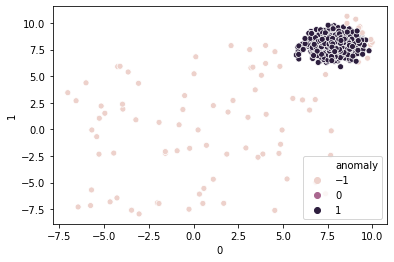

In [31]:
import seaborn as sns
sns.scatterplot(x=0,y=1,hue='anomaly',data=df)
plt.show()

In [32]:
ypred = model.predict(xtrain)
ypred = np.where(ypred<0,1,0)
from sklearn import metrics
metrics.accuracy_score(ytrain,ypred)

0.9825

In [33]:
ypred = model.predict(xtest)
ypred = np.where(ypred<0,1,0)
from sklearn import metrics
metrics.accuracy_score(ytest,ypred)

0.985

In [34]:
metrics.confusion_matrix(ytest,ypred)

array([[177,   3],
       [  0,  20]], dtype=int64)

## Anomaly detection using OneClassSVM

In [37]:
from sklearn.svm import OneClassSVM
model2 = OneClassSVM(gamma=0.2,nu=0.09)
model2.fit(xtrain)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.2, kernel='rbf',
            max_iter=-1, nu=0.09, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

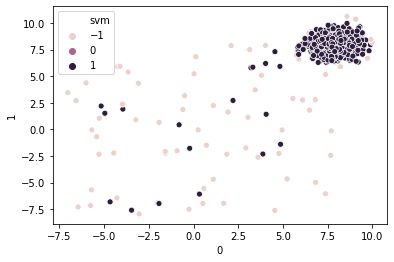

In [38]:
df['svm'] = model2.predict(xtrain)
sns.scatterplot(x=0,y=1,hue='svm',data=df)
plt.show()

In [39]:
ypred = model2.predict(xtrain)
ypred = np.where(ypred<0,1,0)
from sklearn import metrics
metrics.accuracy_score(ytrain,ypred)

0.96125

In [40]:
ypred = model2.predict(xtest)
ypred = np.where(ypred<0,1,0)
from sklearn import metrics
metrics.accuracy_score(ytest,ypred)

0.97